In [1]:
import os, shutil

In [2]:
base_dir = '/home/skhatter/Damage Detection'
train_dir = '/home/skhatter/Damage Detection/train'
valid_dir = '/home/skhatter/Damage Detection/validation'
test_dir = '/home/skhatter/Damage Detection/test'

train_dam_dir = '/home/skhatter/Damage Detection/train/damaged'
train_undam_dir = '/home/skhatter/Damage Detection/train/undamaged'

valid_dam_dir = '/home/skhatter/Damage Detection/validation/damaged'
valid_undam_dir = '/home/skhatter/Damage Detection/validation/undamaged'

test_dir = '/home/skhatter/Damage Detection/test'

In [3]:
print('Total training damaged images', len(os.listdir(train_dam_dir)))
print('Total training undamaged images', len(os.listdir(train_undam_dir)))

print('Total validation damaged images', len(os.listdir(valid_dam_dir)))
print('Total validation undamaged images', len(os.listdir(valid_undam_dir)))

print('Total test damaged images', len(os.listdir(test_dir)))

Total training damaged images 102
Total training undamaged images 141
Total validation damaged images 10
Total validation undamaged images 21
Total test damaged images 2


In [4]:
from keras import layers
from keras import models
from keras.applications import VGG16

Using TensorFlow backend.


In [5]:
conv_base = VGG16(weights = 'imagenet', include_top = False, input_shape=(512,512,3))
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 512, 512, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 512, 512, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 512, 512, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 256, 256, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 256, 256, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 256, 256, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, 128, 128)     0         
__________

In [6]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

datagen = ImageDataGenerator(rescale = 1./255)
batch_size = 5

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count,16,16,512 ))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory, target_size=(512,512),
                                           batch_size=batch_size, class_mode='binary')
    i =0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 243)
validation_features, validation_labels = extract_features(valid_dir, 31)
#test_features, test_labels = extract_features(test_dir, 2)        

Found 243 images belonging to 2 classes.
Found 31 images belonging to 2 classes.


In [7]:
train_features = np.reshape(train_features, (243, 16*16*512))
validation_features = np.reshape(validation_features, (31, 16*16*512))

In [8]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=16*16*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
             loss='binary_crossentropy',
             metrics=['acc'])

In [9]:
history = model.fit(train_features, train_labels, epochs=100, 
                    batch_size =5, 
                    validation_data=(validation_features, validation_labels))

Train on 243 samples, validate on 31 samples
Epoch 1/100
243/243 [==============================] - 1s - loss: 1.9985 - acc: 0.5432 - val_loss: 0.6501 - val_acc: 0.6774
Epoch 2/100
243/243 [==============================] - 1s - loss: 0.8211 - acc: 0.5597 - val_loss: 0.6096 - val_acc: 0.7742
Epoch 3/100
243/243 [==============================] - 0s - loss: 0.7092 - acc: 0.6049 - val_loss: 0.6243 - val_acc: 0.6452
Epoch 4/100
243/243 [==============================] - 1s - loss: 0.6434 - acc: 0.6173 - val_loss: 0.5696 - val_acc: 0.6452
Epoch 5/100
243/243 [==============================] - 0s - loss: 0.6656 - acc: 0.6543 - val_loss: 0.5754 - val_acc: 0.6452
Epoch 6/100
243/243 [==============================] - 1s - loss: 0.5676 - acc: 0.7078 - val_loss: 0.8064 - val_acc: 0.5484
Epoch 7/100
243/243 [==============================] - 1s - loss: 0.5597 - acc: 0.7202 - val_loss: 0.7972 - val_acc: 0.4516
Epoch 8/100
243/243 [==============================] - 1s - loss: 0.5038 - acc: 0.7531 

243/243 [==============================] - 1s - loss: 0.0429 - acc: 0.9918 - val_loss: 1.6707 - val_acc: 0.6129
Epoch 67/100
243/243 [==============================] - 1s - loss: 0.0353 - acc: 0.9918 - val_loss: 1.6146 - val_acc: 0.6129
Epoch 68/100
243/243 [==============================] - 0s - loss: 0.0459 - acc: 0.9835 - val_loss: 1.4598 - val_acc: 0.7097
Epoch 69/100
243/243 [==============================] - 0s - loss: 0.0278 - acc: 0.9918 - val_loss: 1.5915 - val_acc: 0.7097
Epoch 70/100
243/243 [==============================] - 0s - loss: 0.0583 - acc: 0.9877 - val_loss: 1.4574 - val_acc: 0.6774
Epoch 71/100
243/243 [==============================] - 0s - loss: 0.0504 - acc: 0.9877 - val_loss: 1.6274 - val_acc: 0.5806
Epoch 72/100
243/243 [==============================] - 0s - loss: 0.0522 - acc: 0.9835 - val_loss: 1.7399 - val_acc: 0.5484
Epoch 73/100
243/243 [==============================] - 0s - loss: 0.0495 - acc: 0.9794 - val_loss: 1.5986 - val_acc: 0.6774
Epoch 74/100


In [11]:
history_dict = history.history
print(history_dict.keys())

model.save('damage_undamaged_conv3_vgg.h5')

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


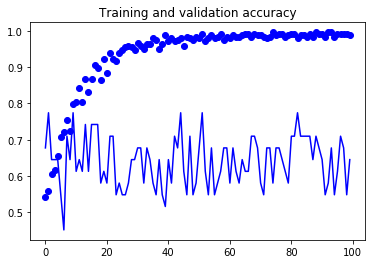

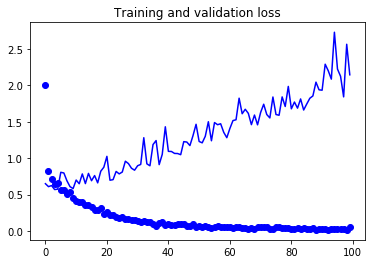

In [12]:
#Displaying curves of loss and accuracy during training 

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo')#dots
plt.plot(epochs, val_acc, 'b')#line segments
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'bo')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.show()

In [13]:
history = model.fit(train_features, train_labels, epochs=50, 
                    batch_size =5, 
                    validation_data=(validation_features, validation_labels))
history_dict = history.history
print(history_dict.keys())

model.save('damage_undamaged_conv3_2_vgg.h5')

Train on 243 samples, validate on 31 samples
Epoch 1/50
243/243 [==============================] - ETA: 0s - loss: 0.0177 - acc: 0.991 - 1s - loss: 0.0168 - acc: 0.9918 - val_loss: 2.2547 - val_acc: 0.6452
Epoch 2/50
243/243 [==============================] - 0s - loss: 0.0212 - acc: 0.9959 - val_loss: 2.1979 - val_acc: 0.6774
Epoch 3/50
243/243 [==============================] - 0s - loss: 0.0288 - acc: 0.9959 - val_loss: 2.1389 - val_acc: 0.6774
Epoch 4/50
243/243 [==============================] - 0s - loss: 0.0278 - acc: 0.9835 - val_loss: 1.9963 - val_acc: 0.6774
Epoch 5/50
243/243 [==============================] - 0s - loss: 0.0357 - acc: 0.9918 - val_loss: 2.5288 - val_acc: 0.5484
Epoch 6/50
243/243 [==============================] - 0s - loss: 0.0266 - acc: 0.9918 - val_loss: 2.5947 - val_acc: 0.5806
Epoch 7/50
243/243 [==============================] - 0s - loss: 0.0465 - acc: 0.9877 - val_loss: 2.2165 - val_acc: 0.6774
Epoch 8/50
243/243 [==============================] - 0s

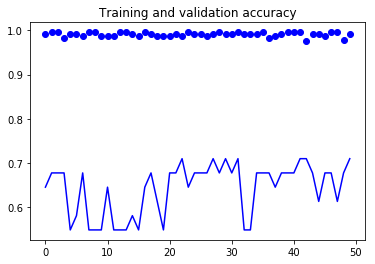

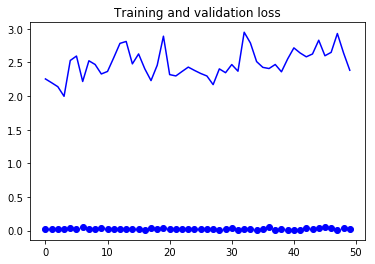

In [14]:
#Displaying curves of loss and accuracy during training 

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo')#dots
plt.plot(epochs, val_acc, 'b')#line segments
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'bo')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.show()